In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

dataset_test = "D:\git_project\workshop_lifting\dataset_test.csv"

In [7]:
def smooth_keypoints(keypoints, window_size=5):
    smoothed = np.copy(keypoints)
    for i in range(keypoints.shape[1]):  # for each keypoint
        for j in range(3):  # x, y, z
            smoothed[:, i, j] = np.convolve(
                keypoints[:, i, j], 
                np.ones(window_size)/window_size, 
                mode='same'
            )
    return smoothed

In [8]:
def ema_keypoints(keypoints, alpha=0.2):
    smoothed = np.copy(keypoints)
    for i in range(1, keypoints.shape[0]):
        smoothed[i] = alpha * keypoints[i] + (1 - alpha) * smoothed[i - 1]
    return smoothed

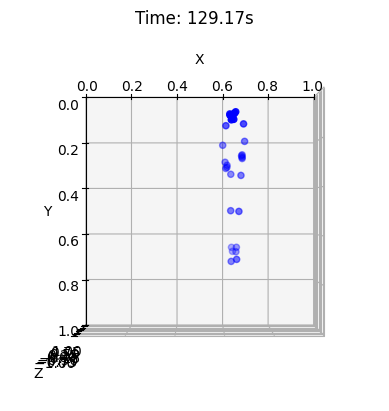

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load your CSV file
df = pd.read_csv(dataset_test)  # เปลี่ยน path ถ้าไฟล์อยู่คนละที่

# เตรียมข้อมูล keypoints
time = df['time'].values
num_keypoints = 33
keypoints = np.zeros((len(df), num_keypoints, 3))

for i in range(num_keypoints):
    keypoints[:, i, 0] = df[f'keypoint_{i}_x']
    keypoints[:, i, 1] = df[f'keypoint_{i}_y']
    keypoints[:, i, 2] = df[f'keypoint_{i}_z']

#smooth keypoints
keypoints = ema_keypoints(keypoints)

# สร้างกราฟ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter([], [], [], c='b', s=20)

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=-90, azim=-90)

    return sc,

def update(frame):
    sc._offsets3d = (
        keypoints[frame, :, 0],
        keypoints[frame, :, 1],
        keypoints[frame, :, 2]
    )
    ax.set_title(f'Time: {time[frame]:.2f}s')
    return sc,

ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=False)

# บันทึกวิดีโอ
ani.save('mediapipe_3d_animation_EMA.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


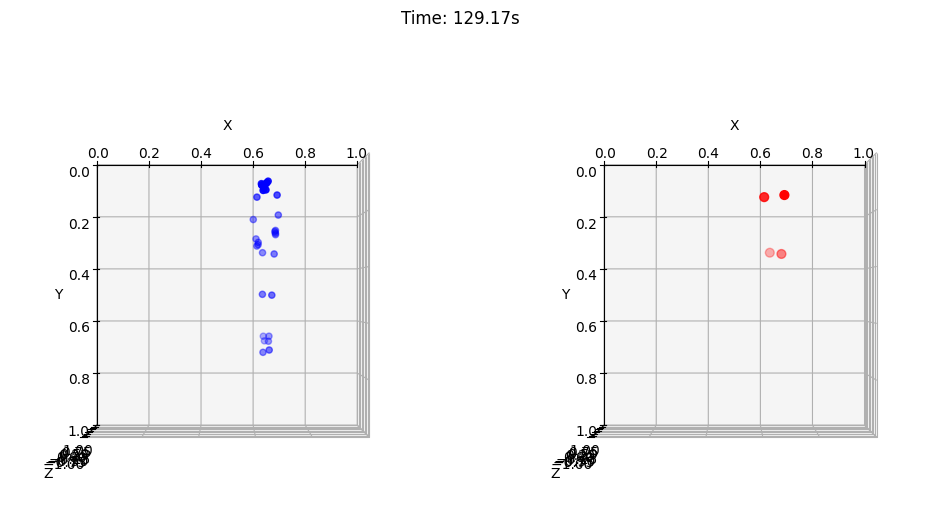

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load CSV
df = pd.read_csv(dataset_test)  # Replace with your actual file path

# Prepare keypoints
time = df['time'].values
num_keypoints = 33
keypoints = np.zeros((len(df), num_keypoints, 3))

for i in range(num_keypoints):
    keypoints[:, i, 0] = df[f'keypoint_{i}_x']
    keypoints[:, i, 1] = df[f'keypoint_{i}_y']
    keypoints[:, i, 2] = df[f'keypoint_{i}_z']

# Smooth keypoints with EMA
def ema_keypoints(keypoints, alpha=0.2):
    smoothed = np.copy(keypoints)
    for i in range(1, keypoints.shape[0]):
        smoothed[i] = alpha * keypoints[i] + (1 - alpha) * smoothed[i - 1]
    return smoothed

keypoints = ema_keypoints(keypoints)

# Selected keypoint indices
selected_ids = [12, 11, 23, 24]

# Create 3D subplots
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')  # full body
ax2 = fig.add_subplot(122, projection='3d')  # 4 keypoints

sc1 = ax1.scatter([], [], [], c='b', s=20)
sc2 = ax2.scatter([], [], [], c='r', s=40)

def init():
    for ax in (ax1, ax2):
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_zlim(-1, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=-90, azim=-90)
    return sc1, sc2

def update(frame):
    # Full body
    sc1._offsets3d = (
        keypoints[frame, :, 0],
        keypoints[frame, :, 1],
        keypoints[frame, :, 2]
    )

    # Selected keypoints
    selected = keypoints[frame, selected_ids]
    sc2._offsets3d = (
        selected[:, 0],
        selected[:, 1],
        selected[:, 2]
    )

    fig.suptitle(f'Time: {time[frame]:.2f}s')
    return sc1, sc2

ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=False)

# Save animation
ani.save('mediapipe_3d_animation_EMA_sw.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


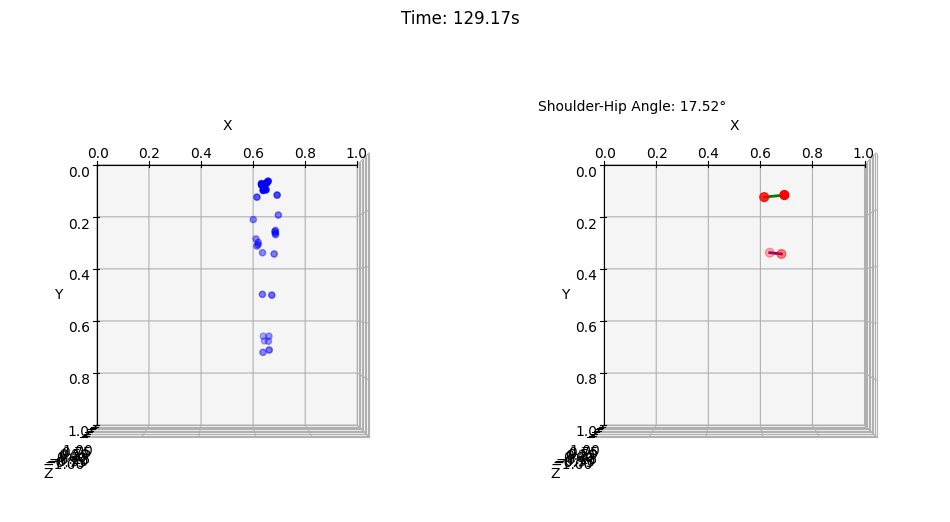

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load CSV
# df = pd.read_csv('dataset_test.csv')
time = df['time'].values
num_keypoints = 33
keypoints = np.zeros((len(df), num_keypoints, 3))

for i in range(num_keypoints):
    keypoints[:, i, 0] = df[f'keypoint_{i}_x']
    keypoints[:, i, 1] = df[f'keypoint_{i}_y']
    keypoints[:, i, 2] = df[f'keypoint_{i}_z']

# Apply EMA smoothing
def ema_keypoints(keypoints, alpha=0.2):
    smoothed = np.copy(keypoints)
    for i in range(1, keypoints.shape[0]):
        smoothed[i] = alpha * keypoints[i] + (1 - alpha) * smoothed[i - 1]
    return smoothed

keypoints = ema_keypoints(keypoints)

# Keypoint indices
RIGHT_SHOULDER = 12
LEFT_SHOULDER = 11
RIGHT_HIP = 24
LEFT_HIP = 23

# Create plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sc1 = ax1.scatter([], [], [], c='b', s=20)
sc2 = ax2.scatter([], [], [], c='r', s=40)

# Line vectors for ax2
shoulder_line, = ax2.plot([], [], [], 'g-', lw=2)
hip_line, = ax2.plot([], [], [], 'purple', lw=2)

# Text for angle
angle_text = ax2.text2D(0.05, 0.95, "", transform=ax2.transAxes)

def init():
    for ax in (ax1, ax2):
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_zlim(-1, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=-90, azim=-90)
    return sc1, sc2, shoulder_line, hip_line, angle_text

def update(frame):
    # Plot full body
    sc1._offsets3d = (
        keypoints[frame, :, 0],
        keypoints[frame, :, 1],
        keypoints[frame, :, 2]
    )

    # Selected keypoints
    kp = keypoints[frame]
    selected_ids = [RIGHT_SHOULDER, LEFT_SHOULDER, LEFT_HIP, RIGHT_HIP]
    selected = kp[selected_ids]
    sc2._offsets3d = (selected[:, 0], selected[:, 1], selected[:, 2])

    # Vectors
    v_shoulder = kp[LEFT_SHOULDER] - kp[RIGHT_SHOULDER]
    v_hip = kp[LEFT_HIP] - kp[RIGHT_HIP]

    # Plot vector lines
    shoulder_line.set_data(
        [kp[RIGHT_SHOULDER][0], kp[LEFT_SHOULDER][0]],
        [kp[RIGHT_SHOULDER][1], kp[LEFT_SHOULDER][1]]
    )
    shoulder_line.set_3d_properties([kp[RIGHT_SHOULDER][2], kp[LEFT_SHOULDER][2]])

    hip_line.set_data(
        [kp[RIGHT_HIP][0], kp[LEFT_HIP][0]],
        [kp[RIGHT_HIP][1], kp[LEFT_HIP][1]]
    )
    hip_line.set_3d_properties([kp[RIGHT_HIP][2], kp[LEFT_HIP][2]])

    # Angle between vectors
    dot_product = np.dot(v_shoulder, v_hip)
    norm_product = np.linalg.norm(v_shoulder) * np.linalg.norm(v_hip)
    angle_rad = np.arccos(np.clip(dot_product / norm_product, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    angle_text.set_text(f"Shoulder-Hip Angle: {angle_deg:.2f}°")
    fig.suptitle(f'Time: {time[frame]:.2f}s')
    return sc1, sc2, shoulder_line, hip_line, angle_text

ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=False)

# Save or show
ani.save('mediapipe_3d_animation_with_angle_original.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


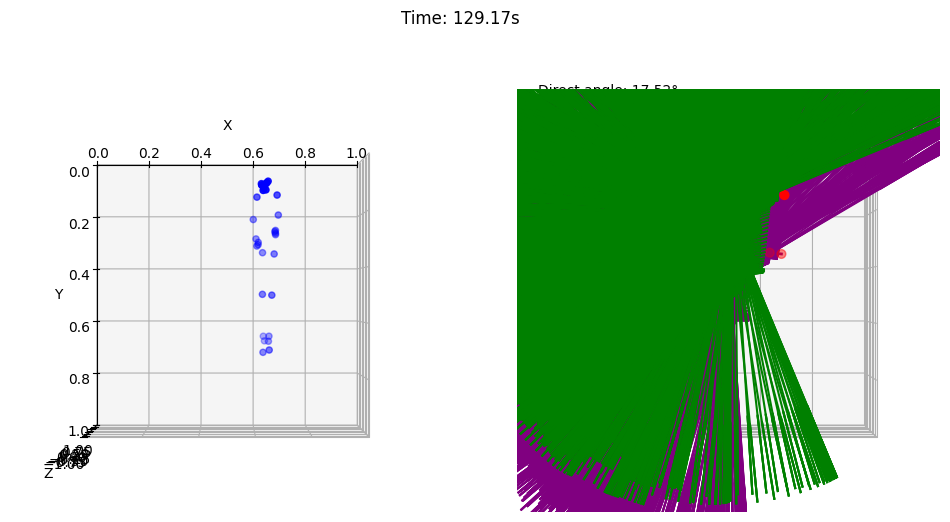

In [15]:
time = df['time'].values
num_keypoints = 33
keypoints = np.zeros((len(df), num_keypoints, 3))

for i in range(num_keypoints):
    keypoints[:, i, 0] = df[f'keypoint_{i}_x']
    keypoints[:, i, 1] = df[f'keypoint_{i}_y']
    keypoints[:, i, 2] = df[f'keypoint_{i}_z']

# Apply EMA smoothing
def ema_keypoints(keypoints, alpha=0.2):
    smoothed = np.copy(keypoints)
    for i in range(1, keypoints.shape[0]):
        smoothed[i] = alpha * keypoints[i] + (1 - alpha) * smoothed[i - 1]
    return smoothed

keypoints = ema_keypoints(keypoints)

# Keypoint indices
RIGHT_SHOULDER = 12
LEFT_SHOULDER = 11
RIGHT_HIP = 24
LEFT_HIP = 23

# Create plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sc1 = ax1.scatter([], [], [], c='b', s=20)
sc2 = ax2.scatter([], [], [], c='r', s=40)

# Line vectors for ax2
shoulder_line, = ax2.plot([], [], [], 'g-', lw=2)
hip_line, = ax2.plot([], [], [], 'purple', lw=2)

# Text for angle
angle_text = ax2.text2D(0.05, 0.95, "", transform=ax2.transAxes)

def init():
    for ax in (ax1, ax2):
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_zlim(-1, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=-90, azim=-90)
    return sc1, sc2, shoulder_line, hip_line, angle_text

def update(frame):
    kp = keypoints[frame]
    selected_ids = [RIGHT_SHOULDER, LEFT_SHOULDER, LEFT_HIP, RIGHT_HIP]
    selected = kp[selected_ids]
    sc1._offsets3d = (kp[:, 0], kp[:, 1], kp[:, 2])
    sc2._offsets3d = (selected[:, 0], selected[:, 1], selected[:, 2])

    # เวกเตอร์หลัก
    v_shoulder = kp[LEFT_SHOULDER] - kp[RIGHT_SHOULDER]
    v_hip = kp[LEFT_HIP] - kp[RIGHT_HIP]

    # เส้นเวกเตอร์ในกราฟ
    shoulder_line.set_data([kp[RIGHT_SHOULDER][0], kp[LEFT_SHOULDER][0]],
                           [kp[RIGHT_SHOULDER][1], kp[LEFT_SHOULDER][1]])
    shoulder_line.set_3d_properties([kp[RIGHT_SHOULDER][2], kp[LEFT_SHOULDER][2]])

    hip_line.set_data([kp[RIGHT_HIP][0], kp[LEFT_HIP][0]],
                      [kp[RIGHT_HIP][1], kp[LEFT_HIP][1]])
    hip_line.set_3d_properties([kp[RIGHT_HIP][2], kp[LEFT_HIP][2]])

    # ----- มุมแบบเดิม (เวกเตอร์ตรง) -----
    dot_v = np.dot(v_shoulder, v_hip)
    angle_raw = np.degrees(np.arccos(np.clip(dot_v / (np.linalg.norm(v_shoulder) * np.linalg.norm(v_hip)), -1.0, 1.0)))

    # ----- เวกเตอร์ตั้งฉาก -----
    vertical = np.array([0, 0, 1])
    n_shoulder = np.cross(v_shoulder, vertical)
    n_hip = np.cross(v_hip, vertical)

    # วาดเวกเตอร์ตั้งฉาก
    origin_s = (kp[RIGHT_SHOULDER] + kp[LEFT_SHOULDER]) / 2
    origin_h = (kp[RIGHT_HIP] + kp[LEFT_HIP]) / 2
    scale = 0.2

    ax2.quiver(*origin_s, *n_shoulder*scale, color='g', length=1, normalize=True)
    ax2.quiver(*origin_h, *n_hip*scale, color='purple', length=1, normalize=True)

    # มุมระหว่าง normal vectors
    dot_n = np.dot(n_shoulder, n_hip)
    angle_normal = np.degrees(np.arccos(np.clip(dot_n / (np.linalg.norm(n_shoulder) * np.linalg.norm(n_hip)), -1.0, 1.0)))

    # แสดงผลลัพธ์
    angle_text.set_text(f"Direct angle: {angle_raw:.2f}°\nNormal angle: {angle_normal:.2f}°")
    fig.suptitle(f'Time: {time[frame]:.2f}s')
    return sc1, sc2, shoulder_line, hip_line, angle_text

ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=False)

# Save or show
ani.save('mediapipe_3d_animation_with_angle.mp4', fps=30, extra_args=['-vcodec', 'libx264'])